<a href="https://colab.research.google.com/github/rowizu/MachineLearningExamples/blob/master/CarPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Copyright**

**Dataset:**

Source: Shaliny Goyal, "Car Price Data"

**Description:**

 A Chinese automobile company Teclov_chinese aspires to enter 
the US market by setting up their manufacturing unit there and producing cars 
locally to give competition to their US and European counterparts. They have 
contracted an automobile consulting company to understand the factors on which 
the pricing of cars depends. Specifically, they want to understand the factors 
affecting the pricing of cars in the American market, since those may be very 
different from the Chinese market.


[Dataset](https://www.kaggle.com/goyalshalini93/car-data)

Analysis Study: Ruwaida Zuhairy 


#Dataset Deatils

Dataset Last Updated: July, 2019


It contains 26 attributes and 205 rows. 

Variables/Columns:
car_ID
symboling          
CarName          
fueltype         
aspiration     
doornumber       
carbody        
drivewheel       
enginelocation   
wheelbase      
carlength        
carwidth       
carheight   
curbweight        
enginetype        
cylindernumber  
enginesize        
fuelsystem      
boreratio       
 stroke          
compressionratio 
horsepower     
peakrpm        
citympg            
highwaympg   
price

The following screenshot shows a sample of the data

<a href="https://ibb.co/XW30qtZ"><img src="https://i.ibb.co/6y19kFR/Screen-Shot-2020-08-07-at-2-18-34-PM.png" alt="Screen-Shot-2020-08-07-at-2-18-34-PM" border="0"></a>

# Problem Statement


This anlaysis study is counducted to find the most related atributes to predict the car price, and evaluate the prediction model. 

In this study case, i tried multiple ML algorithms and evaluated them: 

1. Multiple Linear Regression 
2. Random Forest Regressor
3. decision Tree regressor
4. K-Nearest Neighbours



# Importing the required libraries

In [205]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import io

# Loading The Datasdet

In [206]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (3).csv


In [207]:
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))
print(df.shape)
print(df.describe())
print(df.info())
print(df.head(10))

(205, 26)
           car_ID   symboling   wheelbase  ...     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  ...  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  ...   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776  ...    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  ...   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  ...   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  ...   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  ...   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  ...   49.000000   54.000000  45400.000000

[8 rows x 16 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0 

#Understanding the data, visualising and analysing it

##Car Prices Histogram and boxplot

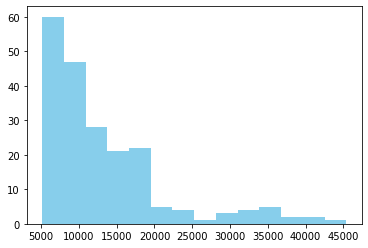

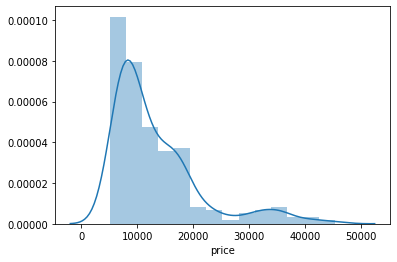

In [208]:
#Using matplotlib
plt.hist(df['price'], bins=14, color='SkyBlue')
plt.show()
#using seaborn
sns.distplot(df['price'])


### We can notice that the histogram for the price is **right skewed** which means:

####1. We can't rely on the center measures to describe our data as the mean here is higher than the median.
####2. The most car prices in our data are in the low range. 

##Boxplot for the spread measure of price variable 

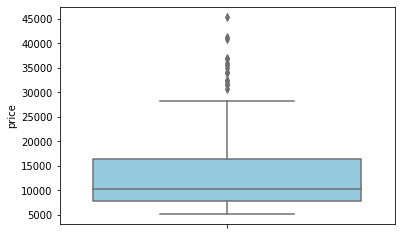

In [209]:
#boxplt
sns.boxplot(y=df['price'], color='SkyBlue')

###The boxplot above is showing that:

####1. The price data **variance is high**, which means the points are spreaded far from the mean.

####2. We can see points above the whisker, and usually those points are treated like outliers, but we are not going to do so, as those cars are having high prices for a reason.

##Exploring The Categorical Data

###Pie Charts to show:

####1. What fuel types the data contains.
####2. What engine types the data contains.
####3. Doors number of cars in the data.
####4. Engine locations.
####5. Car bodies
####6. Car name.
####7. Symboling
####8. Aspiration
####9. Cylinder Numbers
####10. Drive Wheel.



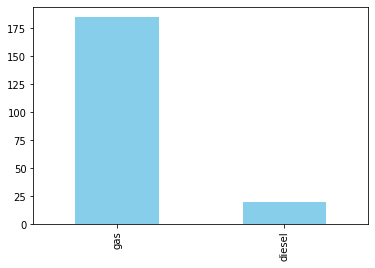

In [210]:
df['fueltype'].value_counts().plot(kind='bar', color='SkyBlue')


We can tell that Gas fueltype is more popular in cars in our dataset than diesel.

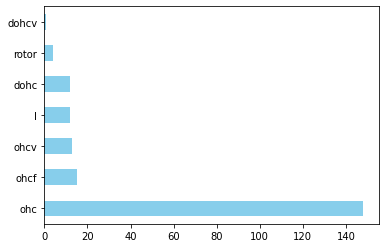

In [211]:
df['enginetype'].value_counts().plot(kind='barh', color='SkyBlue')

The most engine type that the cars have in the dataset is OHC and the least used one is DOHCV

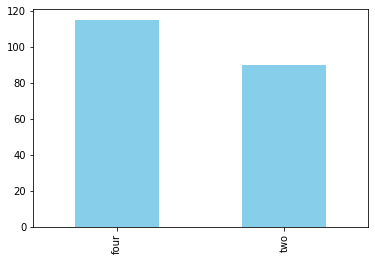

In [212]:
df['doornumber'].value_counts().plot(kind='bar', color='SkyBlue')

Cars with four doors are more used in our dataset.

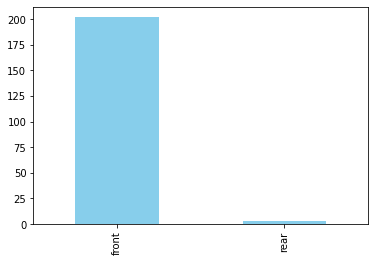

In [213]:
df['enginelocation'].value_counts().plot(kind='bar', color='SkyBlue')

Rear engines are rare in our dataset

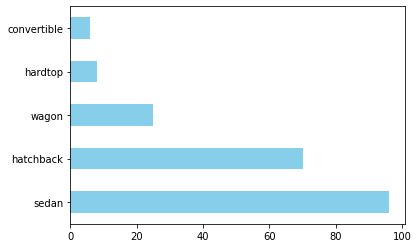

In [214]:
df['carbody'].value_counts().plot(kind='barh', color='SkyBlue')

So Sedan is the most used car body in the data, followed by hatchback, and the least used ones are the convertable ones. 

### The bar polt for car names needs the data to be preprocessed before as the (Handling categorical Data section demonstrates), because it is going to be hard to read the bar chart, due to the name of the car is associated with the car company, which leads to a huge number of data points. 

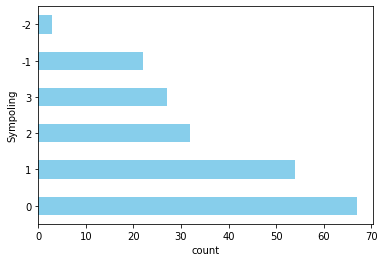

In [215]:
pltsym=df['symboling'].value_counts().plot(kind='barh', color='SkyBlue')
pltsym.set(ylabel="Sympoling", xlabel="count")
plt.show()

Symboling here refers to the risk factor symbol fpr the car associated with it's price. 

-2 indicates that the car is safe, however a value higher than 3 indicates that the car is risky.

the most popular symbol in our dataset is the moderate one 0

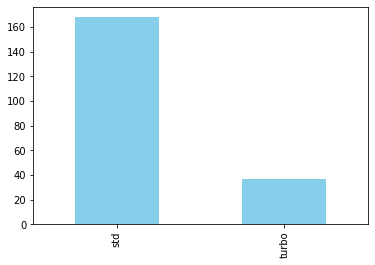

In [216]:
df['aspiration'].value_counts().plot(kind='bar', color='SkyBlue')

Turbo aspiration means increasing the power of the engine without increasing the engine weight, and this type is not popular comparing to the other type where the air flows in the cylinders depends on the atmosphere and the pressure. 

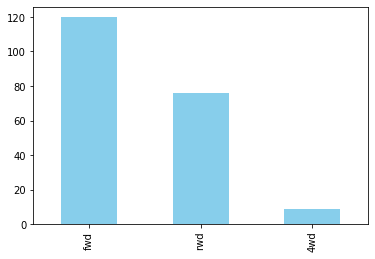

In [217]:
df['drivewheel'].value_counts().plot(kind='bar', color='SkyBlue')

The Forward drive wheel is the most popular one in the dataset.

# Data Cleaning and preprocessing




##Checking column with missing data


In [218]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


##Handeling Categorical Data 

In [219]:
dataset=df
dataset[['carCompany','carName']] = df.CarName.str.split(' ',1,expand=True)
dataset['carCompany']=dataset['carCompany'].str.replace('toyouta','toyota')
dataset['carCompany']=dataset['carCompany'].str.replace('vokswagen','vw')
dataset['carCompany']=dataset['carCompany'].str.replace('volkswagen','vw')
dataset['carCompany']=dataset['carCompany'].str.replace('maxda','mazda')
dataset['carCompany']=dataset['carCompany'].str.replace('porschce','porsche')
dataset['carCompany']=dataset['carCompany'].str.replace('porcshce','porsche')
dataset['carCompany']=dataset['carCompany'].str.replace('Nissan','nissan')
del dataset['carName']
del dataset['CarName']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

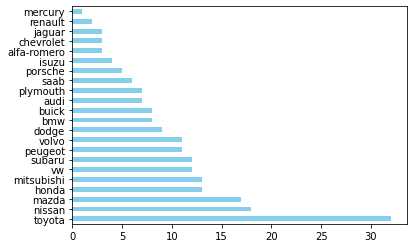

In [220]:
dataset['carCompany'].value_counts().plot(kind='barh', color='SkyBlue')

Toyota is the most car type that is used in our data, floowed by NBissan, then mazda. 

The lesst popular car types are Mercury, Renault, and Jaguar

###To get correlations of each feature in dataset

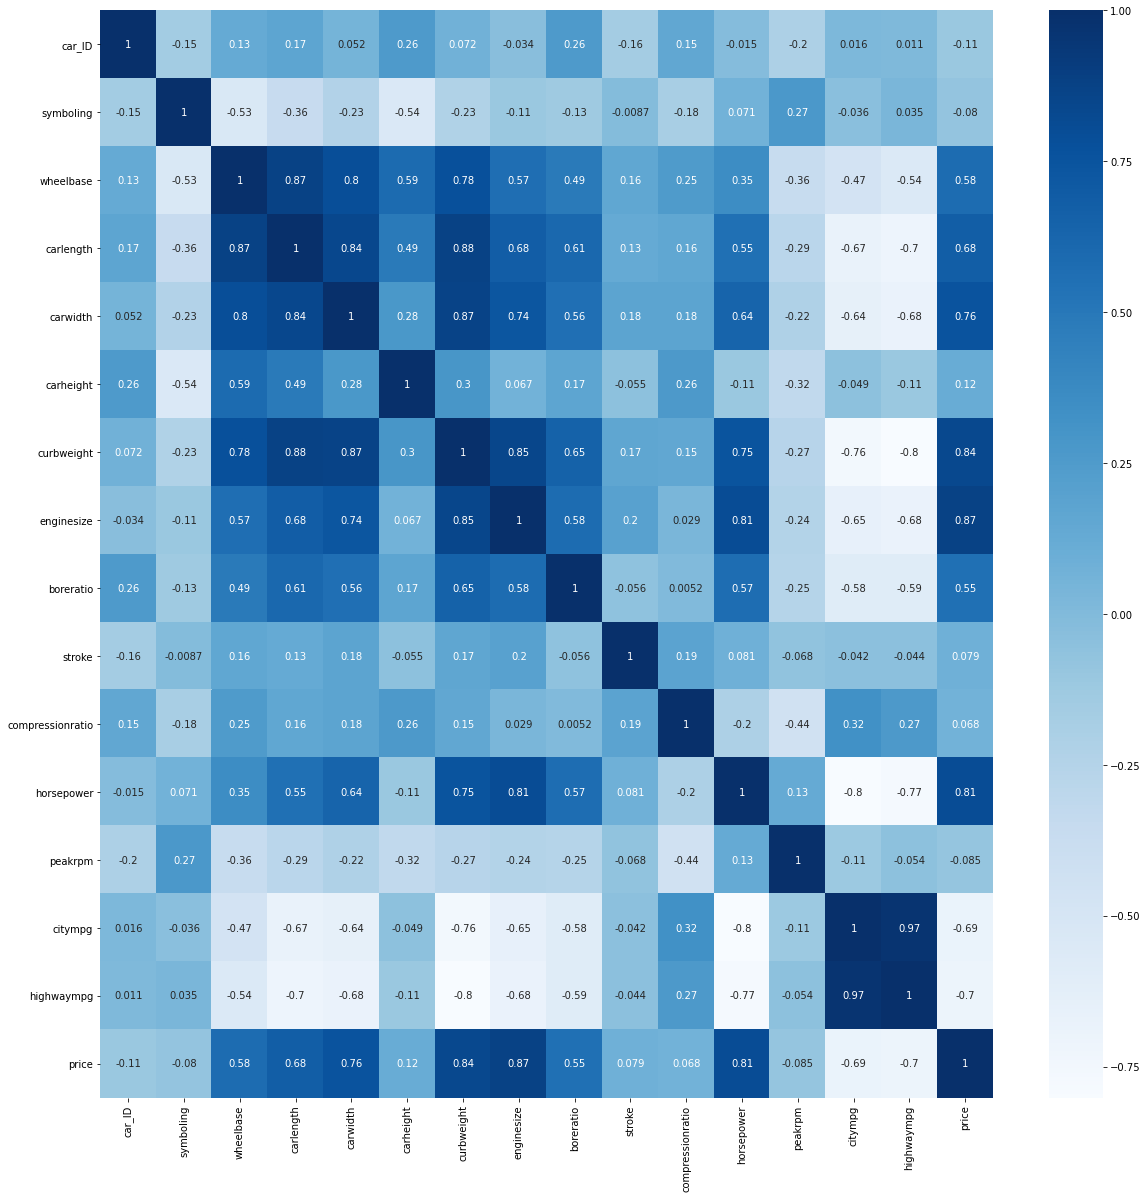

In [221]:
#Correlation calculator and heatmap Function
def correlations_heatmap(dset):
    """
    This function is to evaluate models
    """ 
    corrmat = dset.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(dset[top_corr_features].corr(),annot=True,cmap="Blues")
    return g
correlations_heatmap(dataset)

###Adjusting Dataset upon feature selection, and using OneHotEncoder to transform non numeric data into numeric 

In [222]:
dataset=dataset[['enginesize','horsepower','wheelbase','boreratio','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carCompany','price']]
dataset=pd.get_dummies(dataset,columns=['fueltype','fuelsystem','enginelocation','drivewheel','aspiration','doornumber','carbody','enginetype','cylindernumber','carCompany'])
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enginesize              205 non-null    int64  
 1   horsepower              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   boreratio               205 non-null    float64
 4   price                   205 non-null    float64
 5   fueltype_diesel         205 non-null    uint8  
 6   fueltype_gas            205 non-null    uint8  
 7   fuelsystem_1bbl         205 non-null    uint8  
 8   fuelsystem_2bbl         205 non-null    uint8  
 9   fuelsystem_4bbl         205 non-null    uint8  
 10  fuelsystem_idi          205 non-null    uint8  
 11  fuelsystem_mfi          205 non-null    uint8  
 12  fuelsystem_mpfi         205 non-null    uint8  
 13  fuelsystem_spdi         205 non-null    uint8  
 14  fuelsystem_spfi         205 non-null    ui

In [223]:
dataset.shape

(205, 65)

###Dropping the columns with low correlation value to price (target variable) less than 0.5 or more than -0.5

In [224]:
 #drop columns
cols_to_drop=dataset.corr()[(dataset.corr()['price']<=0.5) & (dataset.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
dataset.drop(cols_to_drop,axis=1,inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   enginesize           205 non-null    int64  
 1   horsepower           205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   boreratio            205 non-null    float64
 4   price                205 non-null    float64
 5   fuelsystem_2bbl      205 non-null    uint8  
 6   fuelsystem_mpfi      205 non-null    uint8  
 7   drivewheel_fwd       205 non-null    uint8  
 8   drivewheel_rwd       205 non-null    uint8  
 9   cylindernumber_four  205 non-null    uint8  
 10  carCompany_buick     205 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 9.3 KB
None


In [225]:
df.shape

(205, 26)

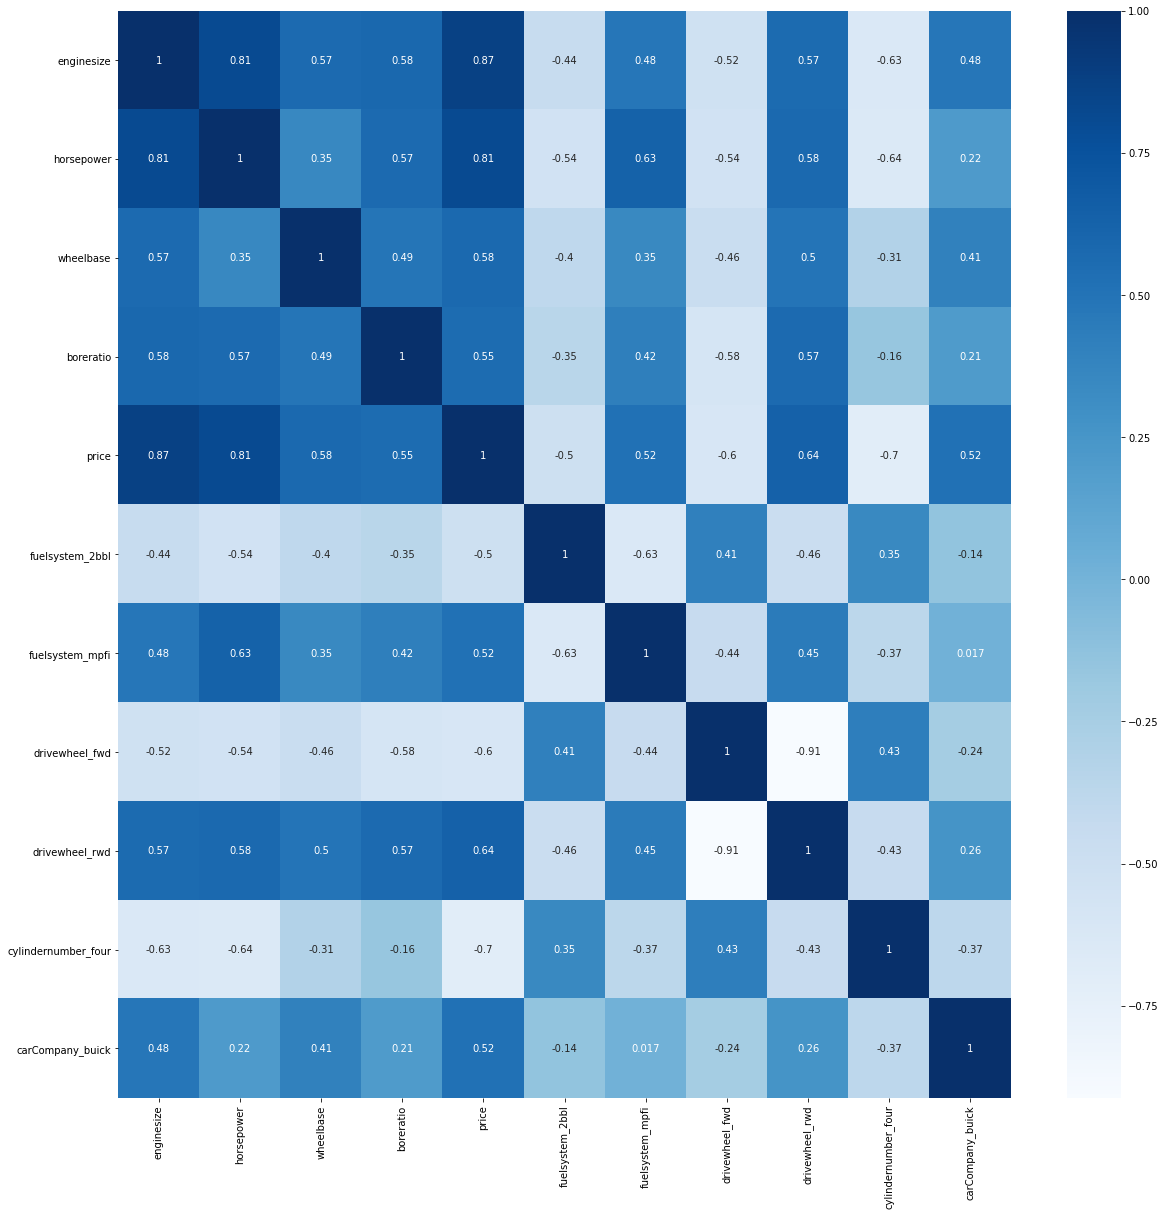

In [226]:
#get correlations of each feature in dataset after dropping low correlated columns

correlations_heatmap(dataset)

In [227]:
#drop low correlated columns with the target variable and high with other features to avoid redudancy
dataset.drop(['horsepower','wheelbase','boreratio'],axis=1,inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   enginesize           205 non-null    int64  
 1   price                205 non-null    float64
 2   fuelsystem_2bbl      205 non-null    uint8  
 3   fuelsystem_mpfi      205 non-null    uint8  
 4   drivewheel_fwd       205 non-null    uint8  
 5   drivewheel_rwd       205 non-null    uint8  
 6   cylindernumber_four  205 non-null    uint8  
 7   carCompany_buick     205 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 4.5 KB
None


###Get correlations of each feature in dataset after dropping low correlated columns

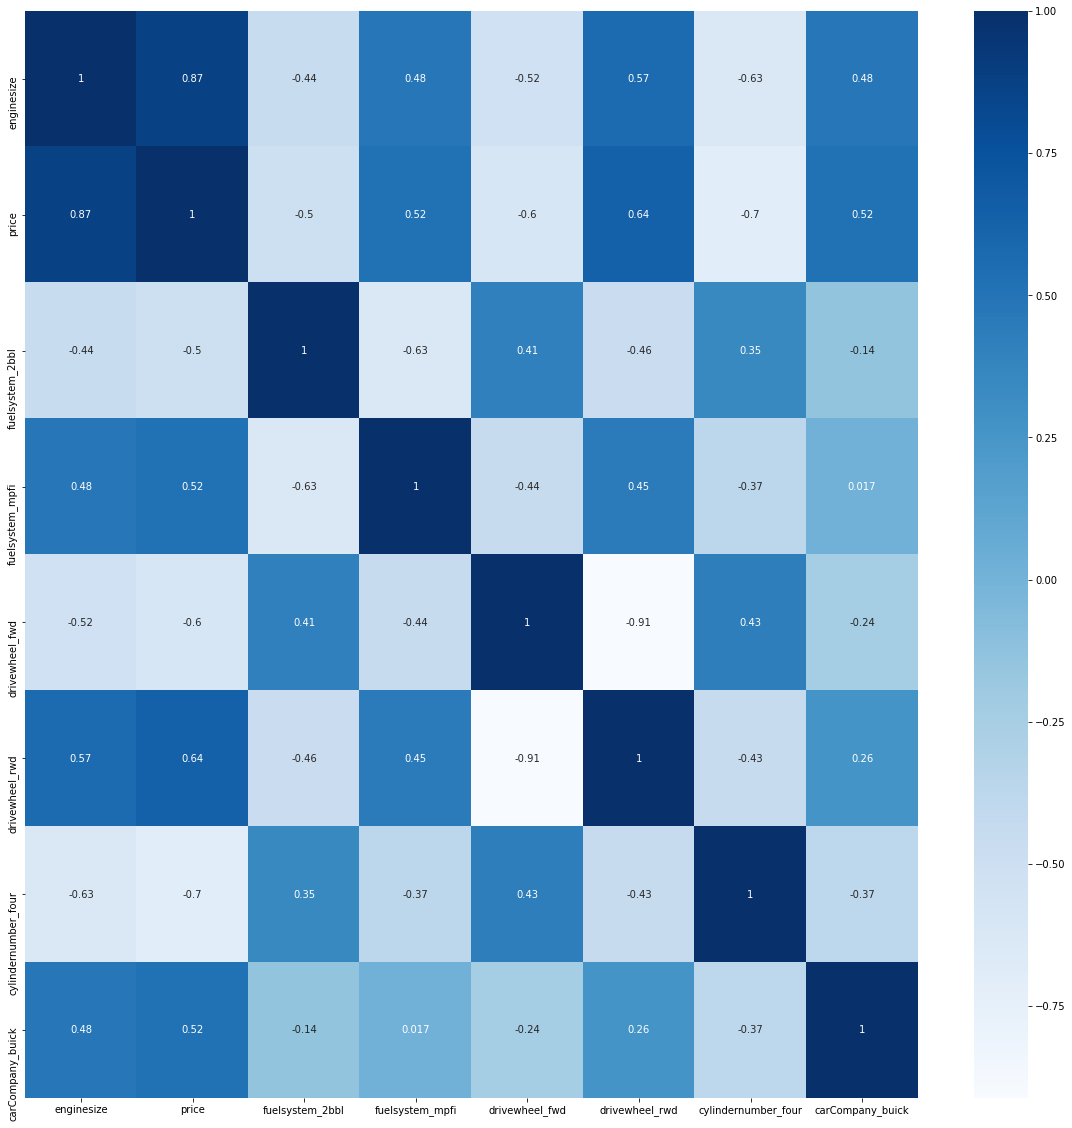

In [228]:
correlations_heatmap(dataset)

Drop low correlated columns with the target variable and high with other features to avoid redundancy: as drivewheel_fwd is high correlated with drivewheel_rwd, and at the same time the correlation of drivewheel_fwd with price is less than the the correlation between drivewheel_rwd and price:

In [229]:
#drop columns
dataset.drop(['drivewheel_fwd','fuelsystem_2bbl','cylindernumber_four'],axis=1,inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enginesize        205 non-null    int64  
 1   price             205 non-null    float64
 2   fuelsystem_mpfi   205 non-null    uint8  
 3   drivewheel_rwd    205 non-null    uint8  
 4   carCompany_buick  205 non-null    uint8  
dtypes: float64(1), int64(1), uint8(3)
memory usage: 3.9 KB
None


Get correlations of each features in dataset after dropping drivewheel_fwd

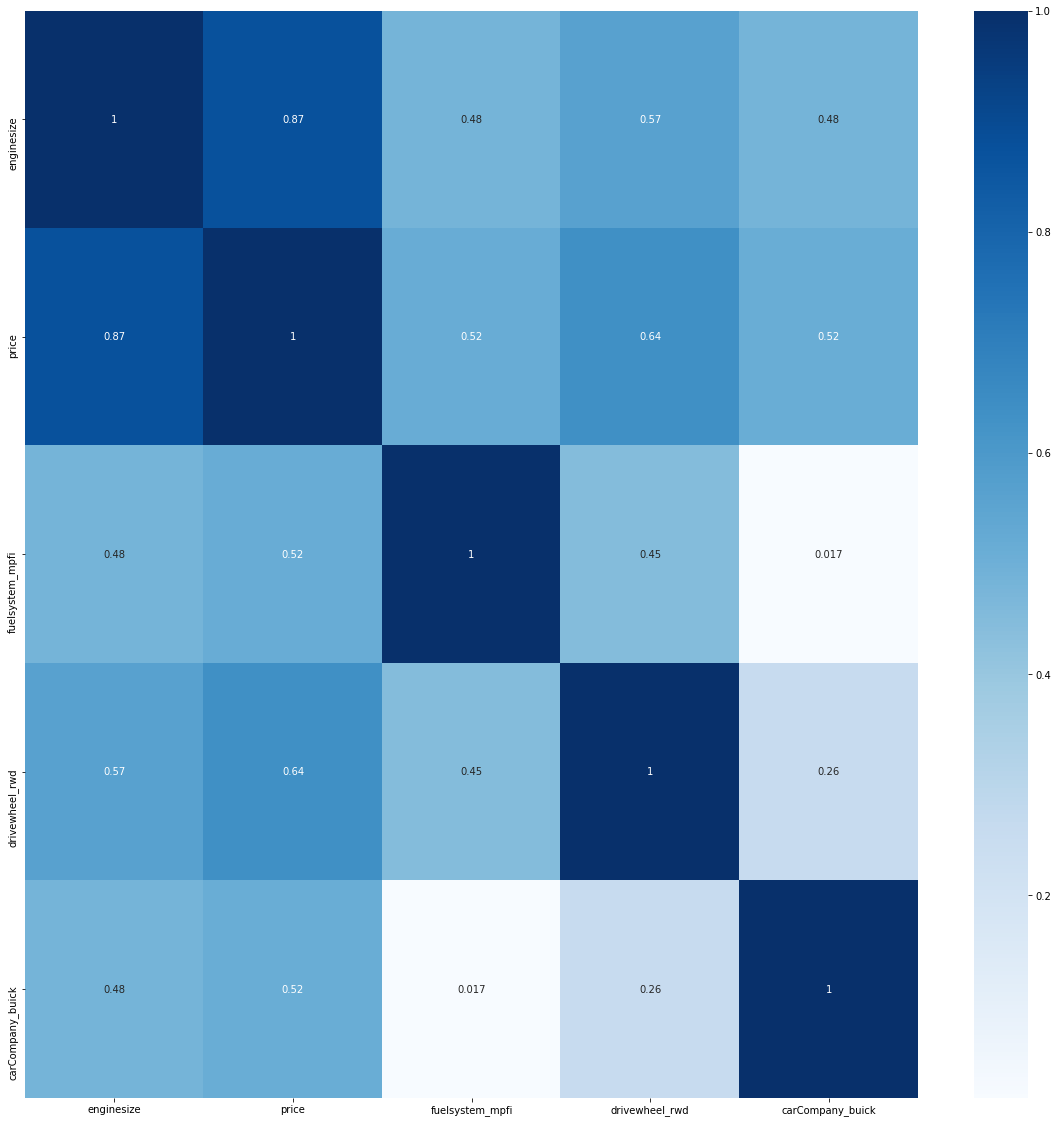

In [230]:
correlations_heatmap(dataset)

#Building Multiple Linear Regression Model

##Assigning the variables

In [231]:
y=dataset.iloc[:,1].values
x_dataset=dataset
x_dataset.drop(['price'],axis=1,inplace=True)
x_dataset.info()
X=x_dataset.iloc[:,:].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   enginesize        205 non-null    int64
 1   fuelsystem_mpfi   205 non-null    uint8
 2   drivewheel_rwd    205 non-null    uint8
 3   carCompany_buick  205 non-null    uint8
dtypes: int64(1), uint8(3)
memory usage: 2.3 KB


##Making sure that the independent varibales are stastically significant to predict the target variable

In [250]:
import statsmodels.api as sm
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              879.7
Date:                Sun, 09 Aug 2020   Prob (F-statistic):                   4.15e-126
Time:                        19:41:25   Log-Likelihood:                         -1969.5
No. Observations:                 205   AIC:                                      3947.
Df Residuals:                     201   BIC:                                      3960.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###So the P value is less than 0.05 which makes the variables(enginesize, fuelsystem_mpfi, drivewheel_rwd, carCompany_buick) are statistically significant and a worthwhile addition to the regression model.

### R-Squared is 0.94 which means 94% of the observed variation in Price can be explained by the chosen independent variables.

##Splitting the dataset into the training set and test set

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Fitting Multiple Linear Regression to the training set

In [252]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Predicting the test set result

In [253]:
y_pred= regressor.predict(X_test)

##Function to evaluate regression models

In [254]:
def evaluate(name,ytest,ypred):
    """
    This function is to evaluate models
    """
    r=r2_score(ytest, ypred)*100
    mse=mean_squared_error(ytest, ypred)
    mae=mean_absolute_error(ytest, ypred)
    rmse=sqrt(mean_absolute_error(ytest, ypred))
    print("The " + name + "\n R2_Score: %.2f%%"% r +" \n Mean Squared Error is "
          + str(mse) + " \n Mean Absolute Error is "+str(mae)+ 
          " \n and root mean squared error is "+str(rmse)+'\n')

##Evaluating the Multiple Linear Regression Model

In [255]:
evaluate('Multiple Linear Regression', y_test, y_pred)

The Multiple Linear Regression
 R2_Score: 83.83% 
 Mean Squared Error is 12763323.123810574 
 Mean Absolute Error is 2158.0883345246148 
 and root mean squared error is 46.455229356065125



#Standarization (Feature Scaling)

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

#Building Random Forest Regressor Model

##Importing Random Forest Regressor model

In [257]:
from sklearn.ensemble import RandomForestRegressor

###set seed to make results reproducible

In [258]:
RF_SEED = 30

##Fitting the training dataset

In [259]:
regressor1 = RandomForestRegressor(n_estimators=1000, random_state=RF_SEED)
regressor1.fit(train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

##Predicting the results

In [260]:
y_pred2 = regressor1.predict(test_scaled)


##Evaluating the model

In [261]:
evaluate('Random Forest Regressor', y_test, y_pred2)

The Random Forest Regressor
 R2_Score: 93.02% 
 Mean Squared Error is 5513535.450953577 
 Mean Absolute Error is 1625.3112546108487 
 and root mean squared error is 40.31514919494716



#Building Decision Tree Regressor Model

##Fitting the training dataset

In [262]:
from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor()
regressor4.fit(train_scaled, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

##Predicting the results

In [263]:
y_pred4=regressor4.predict(test_scaled)

##Evaluating the model

In [264]:
evaluate('Decision Tree Regressor', y_test, y_pred4)

The Decision Tree Regressor
 R2_Score: 88.36% 
 Mean Squared Error is 9187225.41285607 
 Mean Absolute Error is 2165.565032520325 
 and root mean squared error is 46.53563185904243



#Buliding K Nearest Neighbours Model

##Fitting the training dataset

In [265]:
from sklearn.neighbors import KNeighborsRegressor
regressor3 = KNeighborsRegressor()
regressor3.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

##Predicting the results

In [266]:
y_pred3 = regressor3.predict(test_scaled)

##Evaluating the model

In [267]:
evaluate('K Nearest Neighbors Model', y_test, y_pred3)

The K Nearest Neighbors Model
 R2_Score: 90.50% 
 Mean Squared Error is 7503414.415168024 
 Mean Absolute Error is 2081.1772439024394 
 and root mean squared error is 45.61992156835037



#Conclusion

According to the previous results, we noticed that Random Forest Regressor

was the best model fit to predict the price as the R2_score equals **93.02%**, then K-Nearest Neighbours **90.50%**, followed by Decision Tree Regressor **88.36%**, and last Multiple Linear Regression **83.83%**. 

In addition to that, we noticed that the factors which going to effect the price of the car are: 
1. If car company is buick 
2. If fuel System is mpfi
3. If drivewheel is rear
4. Engine Size